**교차검증을 이용한 하이퍼 매개변수 최적화**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from sklearn.model_selection import KFold

import time

In [2]:
# fasion_mnist를 읽고 신경망에 입력할 형태로 변환

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000,784)

x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# 신경망 구조 설정

n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

In [4]:
# 하이퍼 매개변수 설정

batch_size=256
n_epoch = 20
k = 5  #5겹

In [5]:
# 모델을 설계해주는 함수 (모델을 나타내는 객체 model을 반환)

def build_model():
  model=Sequential()
  model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
  model.add(Dense(units=n_hidden2,activation='relu'))
  model.add(Dense(units=n_hidden3,activation='relu'))
  model.add(Dense(units=n_hidden4,activation='relu'))
  model.add(Dense(units=n_output, activation='softmax'))
  return model

In [10]:
# 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해서)

def cross_validation(opt): #opt에 함수 넣기
  start = time.time()
  accuracy=[]
  for train_index, val_index in KFold(k).split(x_train):
    xtrain, xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]
    dmlp = build_model()
    dmlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    dmlp.fit(xtrain, ytrain, batch_size=batch_size, epochs=n_epoch, verbose=0)
    accuracy.append(dmlp.evaluate(xval, yval, verbose=0)[1])
  end = time.time()
  return accuracy



In [11]:
# 옵티마이저 4개에 대해서 교차 검증을 진행
acc_sgd = cross_validation(SGD())
acc_adam = cross_validation(Adam())
acc_adagrad = cross_validation(Adagrad())
acc_rmsprop = cross_validation(RMSprop())

SGD: 0.8528500080108643
Adam: 0.8917333364486695
Adagrad: 0.8312333345413208
RMSprop: 0.8773666620254517


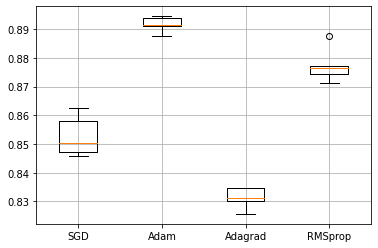

In [12]:
# 4개의 옵티마이저의 정확률을 비교
print("SGD:", np.array(acc_sgd).mean())
print("Adam:", np.array(acc_adam).mean())
print("Adagrad:", np.array(acc_adagrad).mean())
print("RMSprop:", np.array(acc_rmsprop).mean())

import matplotlib.pyplot as plt

plt.boxplot([acc_sgd, acc_adam, acc_adagrad, acc_rmsprop], labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()